In [1]:
from MLP import Dense, Sigmoid, Tanh, Relu, NeuralNetwork
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
%matplotlib widget

# f(x, y) = sin(x) + cos(y)

In [5]:
#Creating data
x = np.random.uniform(-1, 1, 1000)
y = np.random.uniform(-1, 1, 1000)

xy = np.vstack((x, y)).T 
z = np.sin(x) + np.cos(y)

xy_train, xy_test, z_train, z_test = train_test_split(xy, z, test_size=0.3, random_state=42)

# Scaling data using MinMaxScaler
scaler = MinMaxScaler()
xy_train_scaled = scaler.fit_transform(xy_train)
xy_test_scaled = scaler.transform(xy_test)

scaler_z = MinMaxScaler()
z_train_scaled = scaler_z.fit_transform(z_train.reshape(-1, 1)).reshape(-1)
z_test_scaled = scaler_z.transform(z_test.reshape(-1, 1)).reshape(-1)

xy_train_sc = np.reshape(xy_train_scaled, (xy_train_scaled.shape[0], xy_train_scaled.shape[1], 1))
z_train_sc = np.reshape(z_train_scaled, (z_train_scaled.shape[0], 1, 1))
z_true_sc = z_test_scaled.reshape((z_test_scaled.shape[0], 1))

#Training and predicting
learning_rate = 0.01
NN_sc = NeuralNetwork([Dense(2, 10), Tanh(), Dense(10, 10), Tanh(), Dense(10, 1)])
NN_sc.fit(xy_train_sc, z_train_sc, learning_rate=learning_rate, max_iterations=1000)

z_pred_sc = []
for point in xy_test_scaled:
    z_pred_sc.append(NN_sc.predict([[point[0]], [point[1]]]))
z_pred_sc = np.array(z_pred_sc).ravel()


Training:   0%|          | 0/1000 [00:00<?, ?it/s]

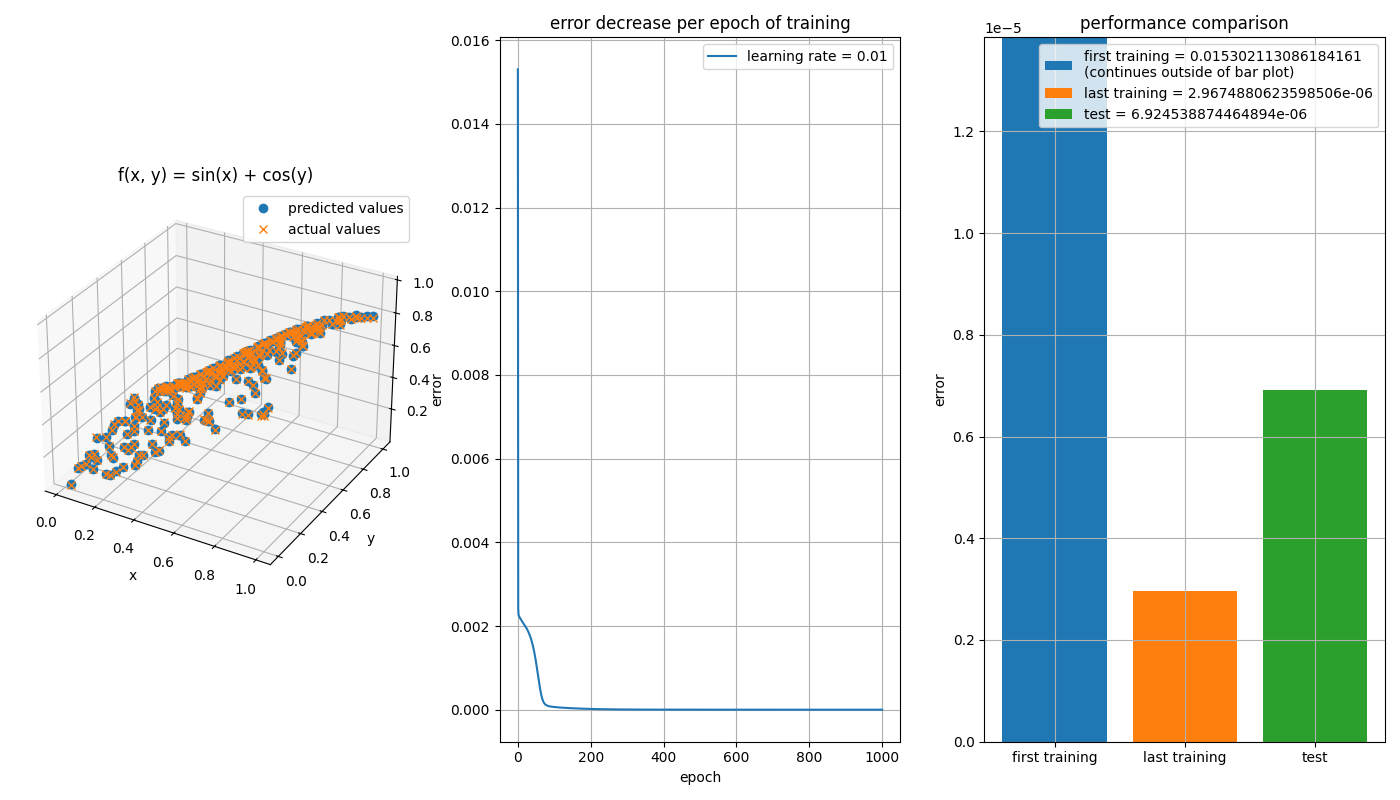

In [7]:
# Plotting predictions
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.plot(xy_test_scaled[:, 0], xy_test_scaled[:, 1], z_pred_sc.ravel(), 'o', label=f'predicted values')
ax1.plot(xy_test_scaled[:, 0], xy_test_scaled[:, 1], z_test_scaled, 'x', label='actual values') 
ax1.set_title('f(x, y) = sin(x) + cos(y)')
ax1.set_ylabel('y')
ax1.set_xlabel('x')
ax1.grid()
ax1.legend()

#plotting error decrease per epoch
errors_sc = NN_sc.error_history
x_plot_sc = np.linspace(0, len(errors_sc), len(errors_sc))
ax2 = fig.add_subplot(1, 3, 2)
ax2.plot(x_plot_sc, errors_sc, label=f"learning rate = {learning_rate}")
ax2.set_title('error decrease per epoch of training')
ax2.set_ylabel('error')
ax2.set_xlabel('epoch')
plt.legend()
ax2.grid()

#plotting bar plot of the performaces
test_mse_sc = NN_sc.mse(z_test_scaled, z_pred_sc)
ax3 = fig.add_subplot(1, 3, 3)
bar_labels = ['first training', 'last training', 'test']
bar_values = [errors_sc[0], errors_sc[-1], test_mse_sc]
ax3.bar(bar_labels[0], bar_values[0], label=f'{bar_labels[0]} = {bar_values[0]}\n(continues outside of bar plot)')
ax3.bar(bar_labels[1], bar_values[1], label=f'{bar_labels[1]} = {bar_values[1]}')
ax3.bar(bar_labels[2], bar_values[2], label=f'{bar_labels[2]} = {bar_values[2]}')
ax3.set_title('performance comparison')
ax3.set_ylabel('error')
ax3.set_ylim(0, bar_values[2]*2)
ax3.legend()
ax3.grid()

plt.tight_layout()
plt.show()